In [28]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM 

In [2]:
data=pd.read_csv('/content/preprocessed_ade.csv')

In [3]:
data

,Unnamed: 0,observation,labels
0,12606,early phase ii semi double blind study of the ...,0
1,685,cessation of mtx therapy led to complete regre...,0
2,5127,cutaneous biopsy showed hyphae and round inclu...,0
3,3158,she was treated with acyclovir and subsequentl...,1
4,10685,cisplatin was substituted and the patient achi...,0
...,...,...,...
23511,982,ticlopidine induced aplastic anemia two new c...,1
23512,14487,the risks of sumatriptan administration in pat...,0
23513,4680,however the spectrum of hosts and clinical p...,0
23514,2588,antibiotic treatment should be continued,0


In [4]:
import gensim
import os
import nltk

In [5]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


In [8]:
data

,Unnamed: 0,observation,labels
0,12606,early phase ii semi double blind study of the ...,0
1,685,cessation of mtx therapy led to complete regre...,0
2,5127,cutaneous biopsy showed hyphae and round inclu...,0
3,3158,she was treated with acyclovir and subsequentl...,1
4,10685,cisplatin was substituted and the patient achi...,0
...,...,...,...
23511,982,ticlopidine induced aplastic anemia two new c...,1
23512,14487,the risks of sumatriptan administration in pat...,0
23513,4680,however the spectrum of hosts and clinical p...,0
23514,2588,antibiotic treatment should be continued,0


In [9]:
!wget -P /root/input/ -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

--2021-06-26 13:18:31--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.202.160
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.202.160|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘/root/input/GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  84.5MB/s    in 25s     

2021-06-26 13:18:56 (62.8 MB/s) - ‘/root/input/GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [10]:
url="https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

In [11]:
embeddings = gensim.models.KeyedVectors.load_word2vec_format(url, binary=True)

In [12]:
docs_vectors = pd.DataFrame() # creating empty final dataframe
stopwords = nltk.corpus.stopwords.words('english') # removing stop words
for doc in data['observation'].str.lower().str.replace('[^a-z ]', ''): # looping through each document and cleaning it
    temp = pd.DataFrame()  # creating a temporary dataframe(store value for 1st doc & for 2nd doc remove the details of 1st & proced through 2nd and so on..)
    for word in doc.split(' '): # looping through each word of a single document and spliting through space
        if word not in stopwords: # if word is not present in stopwords then (try)
            try:
                word_vec = embeddings[word] # if word is present in embeddings(goole provides weights associate with words(300)) then proceed
                temp = temp.append(pd.Series(word_vec), ignore_index = True) # if word is present then append it to temporary dataframe
            except:
                pass
    doc_vector = temp.mean() # take the average of each column(w0, w1, w2,........w300)
    docs_vectors = docs_vectors.append(doc_vector, ignore_index = True) # append each document value to the final dataframe
docs_vectors.shape

(23516, 300)

In [13]:
 docs_vectors['labels'] = data['labels']

In [14]:
docs_vectors = docs_vectors.dropna()

In [15]:
docs_vectors

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,labels
0,-0.050695,-0.013357,-0.008664,0.066528,-0.052307,-0.042175,0.077194,-0.106771,0.094014,0.025045,-0.002279,-0.073015,-0.062754,0.023458,-0.113424,0.005196,-0.003326,0.046899,0.092621,-0.086620,-0.030538,-0.061499,-0.107239,-0.073883,-0.008952,0.003123,-0.046076,0.072083,0.063965,0.034098,-0.001490,-0.015025,0.024556,-0.051412,-0.079405,-0.059469,0.018873,-0.052607,0.112142,-0.071477,...,-0.039042,-0.066981,0.039108,0.031909,0.104273,-0.026176,-0.130332,-0.123133,0.029694,0.054385,0.017690,0.007355,-0.070262,0.055140,0.007670,-0.037689,-0.070933,-0.019201,0.056788,0.044965,0.039923,0.023499,0.012102,0.052272,-0.067769,0.005969,-0.063703,0.014497,0.013255,-0.005880,0.069450,-0.066691,-0.055615,-0.068281,-0.005549,-0.106692,0.031687,-0.025411,0.035197,0
1,-0.003021,0.127523,0.022970,0.078756,-0.108480,-0.006226,-0.025464,-0.258464,0.102407,-0.010974,-0.041590,-0.183228,0.019145,0.065308,0.030192,0.245097,0.080068,-0.014318,0.003296,-0.170492,0.016622,0.125977,-0.055054,0.191996,-0.136230,0.046834,-0.257161,-0.001546,0.073795,-0.008087,0.038411,-0.253988,-0.172902,0.072103,-0.274129,-0.037720,-0.071818,-0.001750,0.019694,-0.058512,...,0.023560,-0.005086,-0.016195,0.122925,0.153564,0.092306,-0.107666,-0.094686,-0.038452,0.129679,0.189931,-0.090637,-0.015818,0.167480,0.069153,-0.120809,0.080282,0.039800,0.011545,0.092285,0.134562,0.054606,-0.062337,-0.047445,-0.135681,0.168050,0.019450,0.060410,-0.014730,-0.113851,0.076541,0.077482,-0.045329,-0.001383,-0.022359,-0.056244,0.130605,0.129150,0.039032,0
2,-0.029696,0.117454,0.070279,0.049297,-0.143677,0.020880,-0.034909,-0.225763,0.071650,0.107422,-0.133434,-0.185225,-0.064337,0.098145,-0.072820,0.187689,0.063008,0.230735,-0.073231,0.010345,-0.069647,-0.056596,-0.062522,0.020130,-0.188754,-0.137140,-0.148304,0.077767,-0.025036,-0.118508,-0.092396,0.002475,0.010717,-0.007025,-0.138278,0.005085,0.043518,0.064731,0.043790,0.038613,...,0.048273,-0.010312,-0.112371,0.046531,0.120449,0.060059,-0.127644,0.040558,-0.075150,-0.036205,0.173329,-0.076527,-0.005085,0.192204,-0.018815,-0.092661,0.006947,0.019054,0.138184,0.096868,0.022367,0.050756,-0.051164,-0.029707,-0.083724,0.039218,-0.012851,-0.146107,0.018256,-0.018488,-0.023948,0.089930,0.033869,-0.042969,0.057861,-0.091569,-0.049128,0.084306,0.066426,0
3,-0.034995,0.044120,0.062256,0.079346,-0.163993,-0.040091,-0.057486,-0.120919,0.014265,0.075091,-0.192383,-0.232945,0.041138,0.021345,-0.151341,0.085903,-0.082441,0.236258,0.020050,0.091936,0.004220,0.075405,0.031786,-0.028285,-0.077676,-0.140102,-0.061558,0.049909,-0.002860,0.038225,-0.122105,-0.236049,-0.023071,0.013157,-0.068324,0.045576,0.005197,0.019531,-0.029465,-0.038295,...,-0.009234,-0.005153,-0.133806,0.153460,0.087899,0.072405,-0.104771,-0.013811,0.003383,0.105730,0.146362,-0.050642,-0.025257,0.165414,-0.028983,-0.061070,0.136161,0.002921,0.026228,-0.047032,0.073661,0.012591,-0.096392,-0.066232,-0.169316,0.125610,0.111904,-0.083758,0.105756,-0.125488,0.016497,-0.001325,0.106097,0.092913,0.194301,-0.168597,0.067226,0.183340,-0.034546,1
4,0.015993,0.063070,-0.002374,0.145820,-0.082438,0.000461,0.064053,-0.192383,0.125637,0.018826,-0.172716,-0.213867,0.005659,0.001294,0.017849,0.249525,0.088019,0.018311,-0.027913,-0.134142,0.034424,0.093031,-0.089423,0.083279,-0.061584,-0.042616,-0.188856,-0.040602,0.014445,0.056342,0.032718,-0.126126,-0.226671,-0.081546,-0.199599,-0.025684,0.005062,0.018643,0.045939,-0.028630,...,-0.041456,-0.042101,-0.080397,0.130995,0.052138,0.089925,-0.214205,-0.121718,-0.065077,0.069255,0.155545,-0.040944,0.047689,0.095893,-0.055393,-0.195258,-0.037672,0.029673,0.011854,0.120734,0.132958,-0.021444,-0.061561,-0.047670,-0.111681,0.130615,-0.031660,0.005324,0.039551,-0.141086,0.047343,0.018546

In [16]:
from sklearn.model_selection import train_test_split 

In [21]:
zerocount=0
onecount=0
for i in y_train:
  if i == 0:
    zerocount+=1
  else:
    onecount+=1
print("no of negative sample in training class is:",zerocount)
print("no of positive sample in training class is:",onecount) 

no of negative sample in training class is: 13328
no of positive sample in training class is: 5478


In [22]:
from tensorflow .keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Embedding


In [29]:
max_features = 300
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(data['observation'].values) 

In [30]:
from gensim.models import KeyedVectors
EMBEDDING_FILE = '/root/input/GoogleNews-vectors-negative300.bin.gz' # from above
word2vec_model = KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True) 

In [32]:
word_index = tokenizer.word_index
print("unique tokens - "+str(len(word_index))) 
vocab_size = len(tokenizer.word_index) + 1
print('vocab_size - '+str(vocab_size)) 

unique tokens - 16445
vocab_size - 16446


In [33]:
embedding_dim = 300
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    if word in word2vec_model: 
        embedding_vector = word2vec_model[word]
        embedding_matrix[i] = embedding_vector 

In [36]:
max_len=68

In [37]:
embedding_layer = Embedding(len(word_index) + 1,
                            embedding_dim,
                            weights=[embedding_matrix],
                            input_length=max_len,
                            trainable=False) 

In [38]:
y = docs_vectors['labels'].values
x=docs_vectors.drop('labels' , axis=1)

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=2021)

In [42]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape) 

(18806, 300)
(18806,)
(4702, 300)
(4702,)


In [43]:
rnn_model=Sequential()

rnn_model.add(Embedding(300, 64, input_length=300))

rnn_model.add(LSTM(192))

rnn_model.add(Dense(1, activation='sigmoid'))  

In [44]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(18806, 300)
(18806,)
(4702, 300)
(4702,)


In [45]:
rnn_model.compile(optimizer='sgd', loss="binary_crossentropy", metrics=['accuracy'])


In [46]:
history=rnn_model.fit(
    x_train, y_train,
    validation_data = (x_test, y_test),
    epochs = 20,batch_size=500)  

Epoch 1/20
38/38 [==============================] - 213s 5s/step - loss: 0.6780 - accuracy: 0.7048 - val_loss: 0.6457 - val_accuracy: 0.7144
Epoch 2/20
38/38 [==============================] - 187s 5s/step - loss: 0.6408 - accuracy: 0.7079 - val_loss: 0.6222 - val_accuracy: 0.7144
Epoch 3/20
38/38 [==============================] - 181s 5s/step - loss: 0.6229 - accuracy: 0.7056 - val_loss: 0.6098 - val_accuracy: 0.7144
Epoch 4/20
38/38 [==============================] - 191s 5s/step - loss: 0.6111 - accuracy: 0.7094 - val_loss: 0.6038 - val_accuracy: 0.7144
Epoch 5/20
38/38 [==============================] - 184s 5s/step - loss: 0.6091 - accuracy: 0.7055 - val_loss: 0.6009 - val_accuracy: 0.7144
Epoch 6/20
38/38 [==============================] - 181s 5s/step - loss: 0.6059 - accuracy: 0.7073 - val_loss: 0.5995 - val_accuracy: 0.7144
Epoch 7/20
38/38 [==============================] - 186s 5s/step - loss: 0.6039 - accuracy: 0.7087 - val_loss: 0.5989 - val_accuracy: 0.7144
Epoch 8/20
38

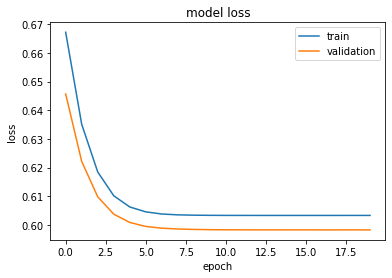

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()  

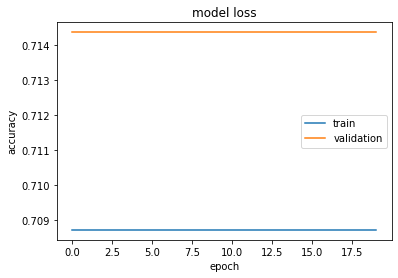

In [48]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()  

In [49]:
import tensorflow as tf 

In [53]:
rnn_model.compile(optimizer='sgd', loss="binary_crossentropy", metrics=[tf.keras.metrics.TrueNegatives(),tf.keras.metrics.TruePositives(),tf.keras.metrics.FalsePositives(),tf.keras.metrics.FalseNegatives()])


In [54]:
rnn_model.fit(
    x_train,y_train,
    validation_data = (x_test,y_test),
    epochs = 3,batch_size=500)

Epoch 1/3
38/38 [==============================] - 218s 5s/step - loss: 0.5984 - true_negatives: 3745.5722 - true_positives: 0.0000e+00 - false_positives: 0.0000e+00 - false_negatives: 1497.7557 - val_loss: 0.5983 - val_true_negatives: 15268.9004 - val_true_positives: 0.0000e+00 - val_false_positives: 0.0000e+00 - val_false_negatives: 6257.2998
Epoch 2/3
14/38 [==========>...................] - ETA: 1:46 - loss: 0.6025 - true_negatives: 18196.7948 - true_positives: 0.0000e+00 - false_positives: 0.0000e+00 - false_negatives: 7436.2050

KeyboardInterrupt: ignored